In [15]:
import pandas as pd
%matplotlib inline
import seaborn as sns
# Generic imports
import os,sys,glob,numpy as np,pandas as pd

# Viz stuff
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Brainspace stuff
#sys.path.append('/home/gabi/Documents/packages/BrainSpace/')
import brainspace
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres,plot_surf
from brainspace.datasets import load_group_fc, load_parcellation
from brainspace.gradient import GradientMaps

# Nipy stuff
from nilearn.plotting import plot_surf,plot_surf_stat_map,view_surf
import nibabel as nib
from brainspace.utils.parcellation import map_to_labels


f = 'data/hcp_r1_cms_cat_1to45.pkl'
df_r1_cms_cat_1to45 = pd.read_pickle(f)
g = 'data/hcp_r1_cms_cat_45to90.pkl'
df_r1_cms_cat_45to90 = pd.read_pickle(g)

frames=[df_r1_cms_cat_1to45,df_r1_cms_cat_45to90]

full_df = pd.concat(frames)

In [4]:
df = full_df.stack('col').unstack('sub').mean(axis=1).unstack('col') 
df

col,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
row,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.586300,0.605966,0.374067,-0.002111,0.532433,0.084425,0.517584,0.334464,0.584271,...,0.147869,0.087783,0.090636,0.127978,0.090892,0.066463,0.188959,0.178075,-0.004904,0.031890
1,0.586300,1.000000,0.469587,0.547283,-0.242418,0.326987,0.162184,0.501024,0.285390,0.593589,...,0.109428,0.009031,0.040892,0.128094,0.067260,0.052067,0.176729,0.178580,-0.045509,0.038346
2,0.605966,0.469587,1.000000,0.586976,0.390478,0.732998,0.335457,0.415418,0.594795,0.459322,...,0.100611,0.043249,0.079183,0.074062,0.057120,0.019484,0.104726,0.100223,-0.034290,-0.006496
3,0.374067,0.547283,0.586976,1.000000,0.163444,0.424879,0.494186,0.340337,0.433876,0.352505,...,0.075181,0.008571,0.027054,0.081124,0.022473,0.000163,0.085545,0.090460,-0.045677,-0.013047
4,-0.002111,-0.242418,0.390478,0.163444,1.000000,0.513526,0.407362,-0.144835,0.479467,-0.066605,...,-0.074656,-0.050384,-0.017083,-0.146636,-0.085756,-0.079767,-0.147343,-0.149731,-0.029113,-0.092826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.066463,0.052067,0.019484,0.000163,-0.079767,0.006633,-0.097285,0.128372,-0.023453,0.040903,...,0.248112,0.229463,0.382217,0.173857,0.368366,1.000000,0.502794,0.269071,0.437111,0.476454
396,0.188959,0.176729,0.104726,0.085545,-0.147343,0.058201,-0.114227,0.325682,0.022772,0.113092,...,0.316969,0.259647,0.366869,0.426180,0.476603,0.502794,1.000000,0.569543,0.319273,0.464865
397,0.178075,0.178580,0.100223,0.090460,-0.149731,0.048956,-0.135312,0.328119,0.028126,0.097784,...,0.268451,0.190159,0.268869,0.592010,0.394454,0.269071,0.569543,1.000000,0.094405,0.340618


In [5]:
bs_data_dir = '/home/gabi/Documents/packages/BrainSpace/brainspace/datasets'

lhp_file = bs_data_dir + '/surfaces/conte69_32k_lh.gii'
rhp_file = bs_data_dir + '/surfaces/conte69_32k_rh.gii'

sch400_parc_file = bs_data_dir + '/parcellations/schaefer_400_conte69.csv'

sch400_parc = load_parcellation('schaefer', scale=400, join=True)

lhp_img = nib.load(lhp_file)
lhp_vtx = lhp_img.darrays[0].data
lhp_tri = lhp_img.darrays[1].data

rhp_img = nib.load(rhp_file)
rhp_vtx = rhp_img.darrays[0].data
rhp_tri = rhp_img.darrays[1].data

lrhp_vtx = np.concatenate([lhp_vtx,rhp_vtx],axis=0)
lrhp_tri = np.concatenate([lhp_tri,rhp_tri+lhp_vtx.shape[0]],axis=0)

In [6]:
mat = df.values.copy()
sch400_hcpfc_gm_pca = GradientMaps(n_components=2, approach='pca', kernel=None)
sch400_hcpfc_gm_pca.fit(mat)

sch400_hcpfc_gm_pca


GradientMaps(alignment=None, approach='pca', kernel=None, n_components=2,
       random_state=None)

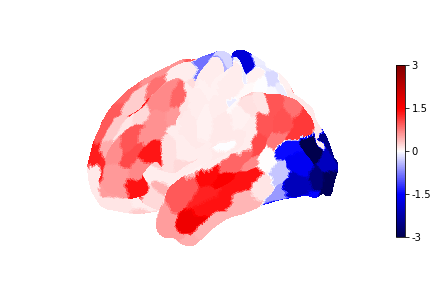

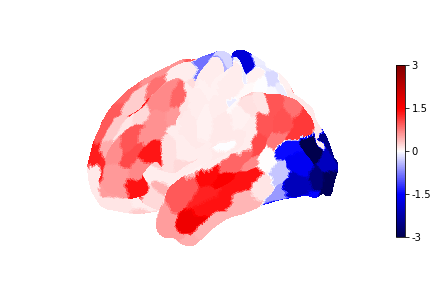

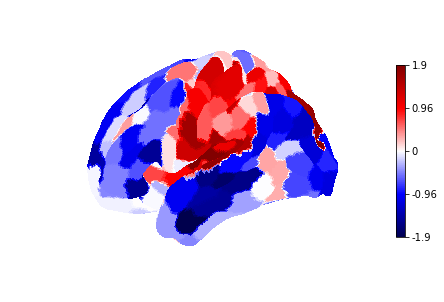

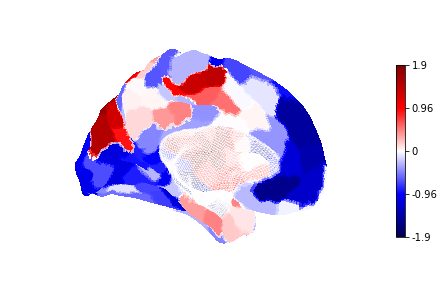

In [14]:
sch400_hcpfc_gm_pca_surf_pc1 = map_to_labels(sch400_hcpfc_gm_pca.gradients_[:, 0], 
                                  sch400_parc, mask=sch400_parc != 0)

sch400_hcpfc_gm_pca_surf_pc2 = map_to_labels(sch400_hcpfc_gm_pca.gradients_[:, 1], 
                                  sch400_parc, mask=sch400_parc != 0)

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_hcpfc_gm_pca_surf_pc1[:32492]*-1,view='lateral',hemi='left',cmap='seismic');


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_hcpfc_gm_pca_surf_pc1[:32492]*-1,view='lateral',hemi='left',cmap='seismic');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_hcpfc_gm_pca_surf_pc2[:32492]*-1,view='lateral',hemi='left',cmap='seismic');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_hcpfc_gm_pca_surf_pc2[:32492]*-1,view='medial',hemi='left',cmap='seismic');

In [13]:
#Just making sure they they're actually orthogonal

np.dot(sch400_hcpfc_gm_pca.gradients_[:,0],sch400_hcpfc_gm_pca.gradients_[:,1])

-9.903189379656396e-14